<a href="https://colab.research.google.com/github/songwoojin04/machine2/blob/main/4week/DL_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

wine = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/4주차/winequality-white.csv", sep=";")

X = wine.drop("quality", axis=1)
y = wine["quality"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

Y = pd.get_dummies(y).values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dense(Y.shape[1], activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=16,
    verbose=1
)

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3356 - loss: 1.7438 - val_accuracy: 0.5051 - val_loss: 1.1965
Epoch 2/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5241 - loss: 1.1695 - val_accuracy: 0.5255 - val_loss: 1.1410
Epoch 3/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5132 - loss: 1.1564 - val_accuracy: 0.5459 - val_loss: 1.0859
Epoch 4/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5510 - loss: 1.0856 - val_accuracy: 0.5561 - val_loss: 1.0628
Epoch 5/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5342 - loss: 1.0978 - val_accuracy: 0.5561 - val_loss: 1.0468
Epoch 6/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5491 - loss: 1.0759 - val_accuracy: 0.5497 - val_loss: 1.0372
Epoch 7/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5656 - loss: 1.0413 - val_accuracy: 0.5599 - val_loss: 1.0371
Epoch 8/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5495 - loss: 1.0491 - val_accuracy: 0.5548 - val_

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


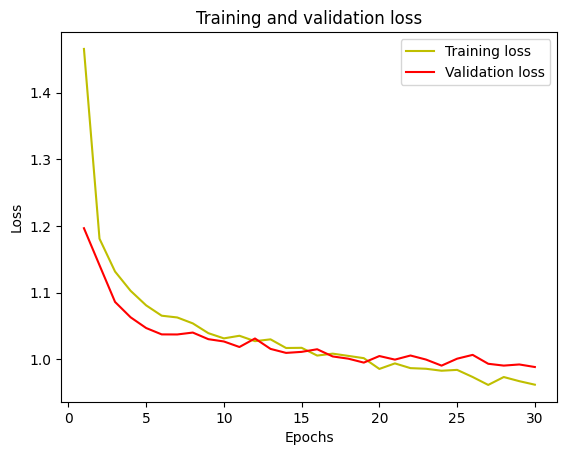

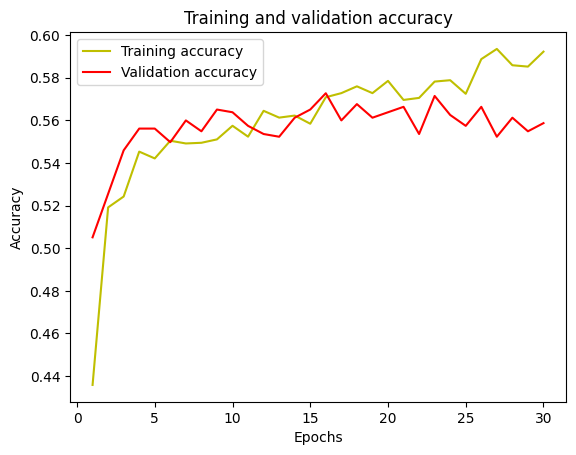

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.75      0.12      0.20        51
           2       0.57      0.56      0.57       295
           3       0.51      0.77      0.61       409
           4       0.64      0.24      0.35       183
           5       1.00      0.03      0.06        33

    accuracy                           0.54       980
   macro avg       0.58      0.29      0.30       980
weighted avg       0.58      0.54      0.51       980

[[  0   0   5   3   1   0]
 [  0   6  32  13   0   0]
 [  0   2 166 126   1   0]
 [  0   0  79 314  16   0]
 [  0   0   7 132  44   0]
 [  0   0   0  25   7   1]]


In [17]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(classification_report(y_test_class, y_pred_class, zero_division=0))
print(confusion_matrix(y_test_class, y_pred_class))